In [56]:
%load_ext autoreload
%autoreload 2
from moscot.problems import GENOTLinProblem
from moscot import datasets
import matplotlib.pyplot as plt
from anndata import AnnData
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


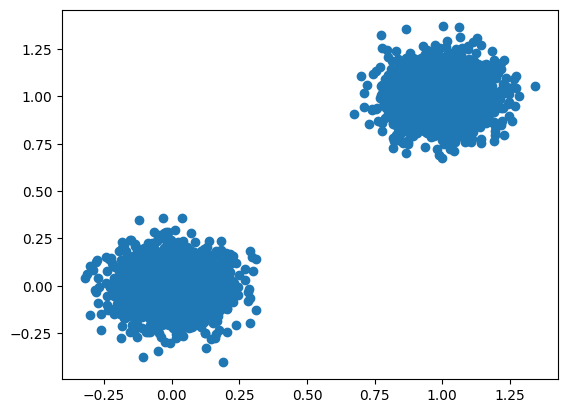

In [57]:
batches = []
n_batches = 2
n_obs_per_batch = 2048
for i in range(n_batches):
    batches += [i] * n_obs_per_batch
adata = AnnData(
    obsm = { 'normal': np.vstack([np.random.multivariate_normal([i, i], [[.01,0],[0,.01]], n_obs_per_batch) for i in range(n_batches)]) },
    obs = { 'batch': batches }
)
plt.scatter(adata.obsm['normal'].T[0], adata.obsm['normal'].T[1])

In [ ]:
problem = GENOTLinProblem(adata)
problem = problem.prepare(key="batch", joint_attr="normal", conditional_attr={"attr": "obs", "key": "batch"})
problem = problem.solve(batch_size=128,iterations= 500, train_size=1.0)

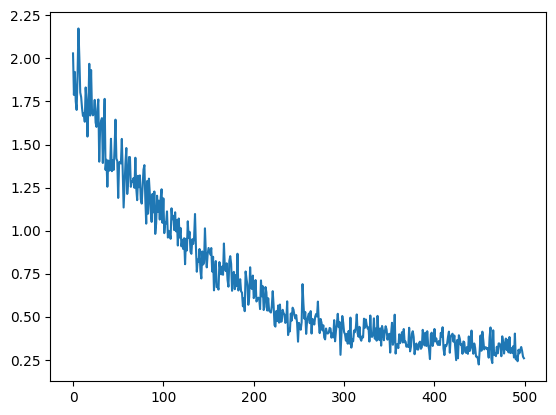

In [54]:
plt.plot(problem.solution.logs['loss'])

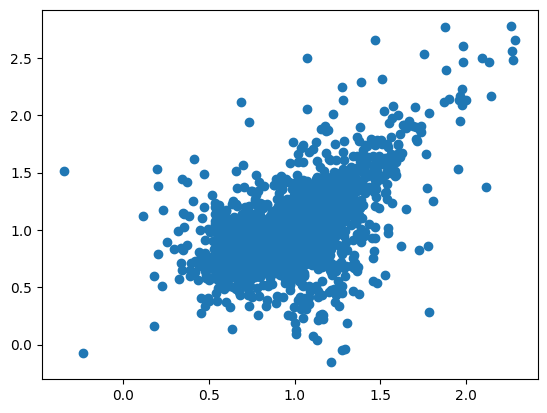

In [55]:
adata_subset = adata[adata.obs['batch'] == 0, :]
pushed = problem.solution.push(adata_subset.obsm['normal'], adata_subset.obs['batch'].values.reshape(adata_subset.shape[0], -1))
plt.scatter(pushed.T[0], pushed.T[1])